# Load Packages


In [601]:
from re import S
import pandas as pd 
from sklearn.neural_network import MLPRegressor
import regex as re
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import datetime as dt
from datetime import date,datetime,timedelta
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures,Normalizer
from sklearn.metrics import mean_squared_error




In [648]:
df = pd.read_csv("~/Desktop/Grailed_Scraper/0202_data_grailed.csv")
#cleaning price
df['price'] = df['price'].str.replace('$','').astype('float')
#removing null values from dataframe in price
df = df[df['price'].isna() == False]
#removing items less than or equal to 100 dollars
df = df[df['price'] <=100]


/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/676130505.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','').astype('float')


# Clean Data / Run Base Model


In [649]:

def cleaner(df):
    #clean color column
    df['likes_flag'] = df['likes']
    df['color'] = df['color'].str.replace('Color:','').str.lower()
    df['color_flag'] = np.where(df['color'].str.findall('green'),'green',
                       np.where(df['color'].str.findall('red|cherry|maroon|crimson|coral'),'red',
                       np.where(df['color'].str.findall('blue|navy|marine|denim|aqua|aztec'),'blue',
                       np.where(df['color'].str.findall('purple|plum|violet'),'purple',
                       np.where(df['color'].str.findall('brown|chocolate|burgundy|beige|khaki|coffee|walnut|earth'),'brown',
                       np.where(df['color'].str.findall('neon'),'neon',
                       np.where(df['color'].str.findall('military|camo|camofla'),'military',
                       np.where(df['color'].str.findall('multi'),'multicolor',
                       np.where(df['color'].str.findall('floral'),'floral',
                       np.where(df['color'].str.findall('faded'),'faded',
                       np.where(df['color'].str.findall('plaid'),'plaid',
                       np.where(df['color'].str.findall('stripe|stripes'),'strip',
                       np.where(df['color'].str.findall('plad'),'plad',
                       np.where(df['color'].str.findall('pink|salmon|peach'),'pink',
                       np.where(df['color'].str.findall('white|cream|clay|tan|oatmeal'),'white',
                       np.where(df['color'].str.findall('black|charcoal|onix'),'black',
                       np.where(df['color'].str.findall('orange|rust'),'orange',
                       np.where(df['color'].str.findall('teal'),'teal',
                       np.where(df['color'].str.findall('grey|silver'),'grey',
                       np.where(df['color'].str.findall('yellow|mustard|'),'yellow', 
                       np.where(df['color'].str.findall('green|olive|turqouise|turqoise|seafoam|sage'),'green','color Not listed')))))))))))))))))))))
    #clean size column
    df['size_flag'] =       np.where(df['size_list'].str.findall('\sXXL'),'XXL',
                       np.where(df['size_list'].str.findall('\sXL'),'XL',
                       np.where(df['size_list'].str.findall('\sM'),'M',
                       np.where(df['size_list'].str.findall('\sS'),'S',
                       np.where(df['size_list'].str.findall('\sL'),'L',
                       np.where(df['size_list'].str.findall('\sXXXL'),'XXXL',
                       np.where(df['size_list'].str.findall('\sONE SIZE'),'One Size','Size Not listed')))))))
    df['title'] = df['title'].str.lower()
#clean type column 
    df['type_flag'] = np.where(df['title'].str.findall('\svest'),'vest',
                       np.where(df['title'].str.findall('\sjacket|jacket|\spuffer|\swindbreaker|\swind|wind|\sshell'),'jacket',
                       np.where(df['title'].str.findall('\sfleece|\sflecee|\ssynchilla|synchilla'),'fleece',
                       np.where(df['title'].str.findall('\shat|\scap|\shead|\sheadwear'),'hat',
                       np.where(df['title'].str.findall('\spant|\strousers|\strouser|\ssweatpants'),'pant',
                       np.where(df['title'].str.findall('\spants'),'pant',
                       np.where(df['title'].str.findall('\sbeanie'),'beanie',
                       np.where(df['title'].str.findall('\sflannel'),'flannel',
                       np.where(df['title'].str.findall('\sglove'),'glove',                      
                       np.where(df['title'].str.findall('\sshorts'),'shorts',
                       np.where(df['title'].str.findall('\sjeans'),'jeans',
                       np.where(df['title'].str.findall('\sparka'),'parka',
                       np.where(df['title'].str.findall('\sshirt'),'shirt',
                       np.where(df['title'].str.findall('\st-shirt|\stshirt|s\short sleeve'),'shirt',
                       np.where(df['title'].str.findall('\st'),'shirt',
                       np.where(df['title'].str.findall('\stee'),'shirt',
                       np.where(df['title'].str.findall('\spullover|\spull over'),'pullover',
                       np.where(df['title'].str.findall('\ssneaker|\sshoe|\sshoes|\sboots|\sboot'),'shoes',
                       np.where(df['title'].str.findall('\sbag|\stote'),'bag',
                       np.where(df['title'].str.findall('\sbackpack'),'backpack',
                       np.where(df['title'].str.findall('\shoodie|\ssweatshirt|\shoody'),'sweatshirt',
                       np.where(df['title'].str.findall('\slong sleeve|\sturtleneck|\slongsleeve'),'long sleeve shirt',
                       np.where(df['title'].str.findall('\sbutton'),'dress shirt',
                       np.where(df['title'].str.findall('\spolo'),'polo shirt',                     
                       np.where(df['title'].str.findall('\stee'),'shirt',
                       np.where(df['title'].str.findall('\sdenim'),'jeans',
                       np.where(df['title'].str.findall('\ssweater|sweater|\scardigan'),'sweater',
                       np.where(df['title'].str.findall('\scoat'),'jacket','Clothing Not listed'))))))))))))))))))))))))))))
    
    df['item_description'] = df['item_description'].str.lower()
    df['vintage_flag'] = np.where(df['title'].str.contains('vintage'),1,
                    np.where(df['item_description'].str.contains('vintage'),1,0))
    df['patagonia_flag'] = np.where(df['title'].str.contains('patagonia'),1,0)
    df['nike_flag'] = np.where(df['title'].str.contains('nike'),1,0)
    df['ll_bean_flag'] = np.where(df['title'].str.contains('arcteryx|arc-teryx|arc teryx'),1,0)
    df['arcteryx_flag'] = np.where(df['title'].str.contains('ll bean|ll_bean|l.l. bean|l.l.'),1,0)
    df['columbia_flag'] = np.where(df['title'].str.contains('columbia'),1,0)
    df['champion_flag'] = np.where(df['title'].str.contains('champion'),1,0)
    df['stussy_flag'] = np.where(df['title'].str.contains('stussy'),1,0)
    df['ralph_lauren_flag'] = np.where(df['title'].str.contains('ralph lauren|ralph'),1,0)
    df['north_face_flag'] = np.where(df['title'].str.contains('north face|north_face'),1,0)
    df['gap_flag'] = np.where(df['title'].str.contains('gap'),1,0)
    df['adidas_flag'] = np.where(df['title'].str.contains('adidas'),1,0)
    df['helly_hanson_flag'] = np.where(df['title'].str.contains('uniqlo'),1,0)
    df['rei_flag'] = np.where(df['title'].str.contains('rei'),1,0)    
    df['uniqlo_flag'] = np.where(df['title'].str.contains('helly hanson|hh'),1,0)
    df['tommy-hilfiger_flag'] = np.where(df['title'].str.contains('tommy hilfiger'),1,0)      
    df['fila_flag'] = np.where(df['title'].str.contains('fila'),1,0)      
    df['2000s_flag'] = np.where(df['title'].str.contains('0\ds|0\d\'s|00s|00\'s|2000|2000s|2000\'s|200\d|200\ds|200\d\'s|20\d\d|20\d\ds|20\d\d\'s'),1,0)  
    df['90s_flag'] = np.where(df['title'].str.contains('\'90\'s|\'90s|90s|1990\'s|1990s|1990|90'),1,0)
    df['80s_flag'] = np.where(df['title'].str.contains('\'80\'s|\'80s|80s|1980\'s|1980s|1980|80'),1,0)
    df['70s_flag'] = np.where(df['title'].str.contains('\'70\'s|\'70s|70s|1970\'s|1970s|1970|70'),1,0)
    df['rare_flag'] = np.where(df['title'].str.contains('rare'),1,0)
    df['organic_flag'] = np.where(df['title'].str.contains('organic'),1,0)
    df['mens_flag'] = np.where(df['title'].str.contains('mens|men\'s'),1,0)
    df['womens_flag'] = np.where(df['title'].str.contains('womens|women\'s'),1,0)
    df['nylon_flag'] = np.where(df['title'].str.contains('nylon'),1,0)
    df['retro_flag'] = np.where(df['title'].str.contains('retro'),1,0)
    df['flannel_flag'] = np.where(df['title'].str.contains('flannel'),1,0)
    df['plad_flag'] = np.where(df['title'].str.contains('plad'),1,0)
    df['mesh_flag'] = np.where(df['title'].str.contains('mesh'),1,0)
    df['nautica_flag'] = np.where(df['title'].str.contains('nautica'),1,0)
    df['tech_flag'] = np.where(df['title'].str.contains('tech'),1,0)
    df['multi_brand_flag'] = np.where(df['title'].str.contains('[a-z]\sx\s[a-z]'),1,0)
    df['pile_flag'] = np.where(df['title'].str.contains('pile'),1,0)
    df['japanese_flag'] = np.where(df['title'].str.contains('japan|japanese'),1,0)
    df['usa_flag'] = np.where(df['title'].str.contains('u.s.a|usa|us|united states|america'),1,0)
    df['repaired_flag'] = np.where(df['title'].str.contains('repaired'),1,0)
    df['distressed_flag'] = np.where(df['title'].str.contains('distressed'),1,0)
    df['goretex_flag'] = np.where(df['title'].str.contains('goretex'),1,0)
    df['carhartt_flag'] = np.where(df['title'].str.contains('carhartt'),1,0)
    df['mammut_flag'] = np.where(df['title'].str.contains('mammut'),1,0)
    df['synchilla_flag'] = np.where(df['title'].str.contains('synchilla'),1,0)
    df['down_flag'] = np.where(df['title'].str.contains('goose|down'),1,0)
    df['fish_flag'] = np.where(df['title'].str.contains('fish'),1,0)
    df['corduroy_flag'] = np.where(df['title'].str.contains('corduroy'),1,0)
    df['5_panel_flag'] = np.where(df['title'].str.contains('5 panel|5-panel|five panel'),1,0)
    df['winter_flag'] = np.where(df['title'].str.contains('winter|snow'),1,0)
    df['fall_flag'] = np.where(df['title'].str.contains('fall'),1,0)
    df['summer_flag'] = np.where(df['title'].str.contains('summer|swim'),1,0)
    df['spring_flag'] = np.where(df['title'].str.contains('spring'),1,0)
    df['big_logo_flag'] = np.where(df['title'].str.contains('big logo'),1,0)
    df['marmot_flag'] = np.where(df['title'].str.contains('marmot'),1,0)
    #CLEAN CONDITION
    df['condition_flag'] = df['condition'].str.replace('Condition: ','')
    #CLEAN TRANSACTIONS
    df['seller_transactions'] = df['seller_transactions'].astype('str')
    df['seller_transactions_flag'] = df['seller_transactions'].str.replace('-','')
    df['seller_transactions_flag'] = df['seller_transactions'].str.replace('~\d','')
    df['seller_transactions_flag'] = df['seller_transactions'].str.replace(r"\(.*\)","")
    # df['seller_transactions_flag'] = df['seller_transactions_flag'].astype('float')
    #CLEAN FEEDBACK
    df['seller_feedback_flag'] = df['seller_feedback'].str.replace('Feedback','')
    #CLEAN LISTINGS
    df['seller_listings_flag'] = df['seller_listings'].str.replace('[a-zA-Z]','')
    #CLEAN SHIPPING COSTS
    df['shipping_cost_flag'] = df['shipping_cost'].str.replace('$','')
    df['shipping_cost_flag'] = df['shipping_cost_flag'].str.replace('+','')

    df['new_price_flag'] = df['price']
    df = df.fillna(0)
    df = df.replace('NaN',0)
    df_cols = [i for i in df.columns if 'flag' in i ]

    return df[df_cols]

df = cleaner(df)
# df  = df[df['patagonia_flag'] == 1]
ml_df = df.copy()
# ml_df = ml_df[['seller_listings_flag','new_price_flag','color_flag','condition_flag','size_flag','type_flag','vintage_flag','likes_flag','seller_transactions_flag','seller_feedback_flag','shipping_cost_flag','90s_flag','patagonia_flag']]

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ['color_flag','condition_flag','size_flag','type_flag']
for feature in features_to_encode:
    res = encode_and_bind(ml_df, feature)
res = encode_and_bind(res,'size_flag')
res = encode_and_bind(res,'color_flag')
res = encode_and_bind(res,'condition_flag')

X = res.drop(columns ='new_price_flag')
# X = X.astype('int64')
Y = res['new_price_flag']
# Y = Y.astype('float')


/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/1624743004.py:124: FutureWarning: The default value of regex will change from True to False in a future version.
  df['seller_transactions_flag'] = df['seller_transactions'].str.replace('~\d','')
/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/1624743004.py:125: FutureWarning: The default value of regex will change from True to False in a future version.
  df['seller_transactions_flag'] = df['seller_transactions'].str.replace(r"\(.*\)","")
/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/1624743004.py:130: FutureWarning: The default value of regex will change from True to False in a future version.
  df['seller_listings_flag'] = df['seller_listings'].str.replace('[a-zA-Z]','')
/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/1624743004.py:132: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular 

## Scaling Continuose / Remove Bad Features

In [650]:
# poly = PolynomialFeatures(degree=2,interaction_only=True)
# X_poly = pd.DataFrame(poly.fit_transform(X))
# X_poly= X_poly.reset_index(drop=True,inplace=False)
# #concat back
# X_total= pd.concat([X,X_poly],axis=1)


# scaler = MinMaxScaler()
# X['seller_feedback_flag'] = scaler.fit_transform(X['seller_feedback_flag'].values.reshape(-1,1))
# X['seller_listings_flag'] = scaler.fit_transform(X['seller_listings_flag'].values.reshape(-1,1))
# X['likes_flag'] = scaler.fit_transform(X['likes_flag'].values.reshape(-1,1))
# X['shipping_cost_flag'] = scaler.fit_transform(X['shipping_cost_flag'].values.reshape(-1,1))
print(X.shape)
print(Y.shape)
X = X.replace('',0).fillna(0)
X = X.astype('float')
X = X.fillna(0)
Y = Y.replace('',0).fillna(0)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



(5666, 108)
(5666,)


In [651]:
X.fillna(0)

,likes_flag,vintage_flag,patagonia_flag,nike_flag,ll_bean_flag,arcteryx_flag,columbia_flag,champion_flag,stussy_flag,ralph_lauren_flag,...,color_flag_purple,color_flag_red,color_flag_strip,color_flag_teal,color_flag_white,color_flag_yellow,condition_flag_Gently Used,condition_flag_New,condition_flag_Used,condition_flag_Worn
1,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8784,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8785,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8786,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Inital Model / Feature Importance

24.07744909569125


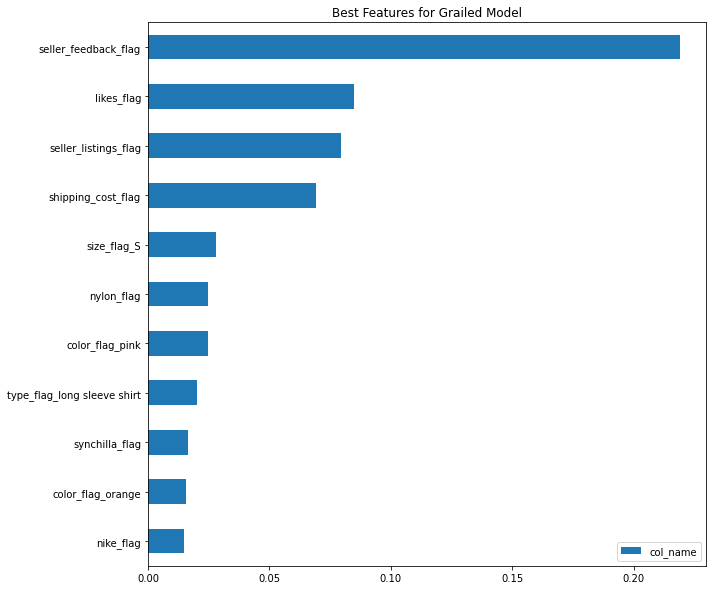

In [675]:
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train,Y_train)
predictions = clf.predict(X_validation)
print(mean_squared_error(Y_validation,predictions,squared=False))


features_best_max = pd.DataFrame({'col_name': clf.feature_importances_}, index=X_train.columns).sort_values(by='col_name', ascending=True)

features_best_max[features_best_max['col_name']>0.014].plot(kind='barh',figsize=(10,10),title='Best Features for Grailed Model')

feature_name = []
feature_scores = []
for i,z in zip(X.columns,clf.feature_importances_):
    feature_name.append(i)
    feature_scores.append(z)
dictionary = dict(zip(feature_name,feature_scores))
best_features = pd.DataFrame.from_dict(dictionary,orient='index').sort_values(by=0,ascending = False).reset_index()
best_features_final = best_features[best_features[0]>0.01]
# X_train_reduced = X_train.drop(columns = [col for col in X_train if col in best_features_final['index']])
# X_test_reduced = X_validation.drop(columns = [col for col in X_validation if col not in best_features])
# best_features_final.sort_values(by=0, ascending=True).plot(kind='barh',figsize=(10,10))

# ML Pipeline

In [653]:
scoring = 'neg_mean_squared_error'
# Spot-Check Algorithms
models = []
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic', ElasticNet()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
models.append(('Decision', DecisionTreeRegressor()))
models.append(('MLP', MLPRegressor()))


##################################################
# evaluate each model in turn
results = []
names = []
score = 'neg_mean_squared_error'
# store preds
from sklearn.model_selection import cross_val_predict
dwPreds = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
 # store the metrics
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = score)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, abs(cv_results.mean()), cv_results.std())

 
 print(msg)

Ridge: 576.505251 (21.135740)
Lasso: 569.539215 (24.057464)
Elastic: 569.587902 (24.054565)
GBR: 570.366415 (23.524845)
SVR: 570.431103 (23.856639)
Decision: 1147.076488 (61.218399)
MLP: 662.569546 (73.478913)


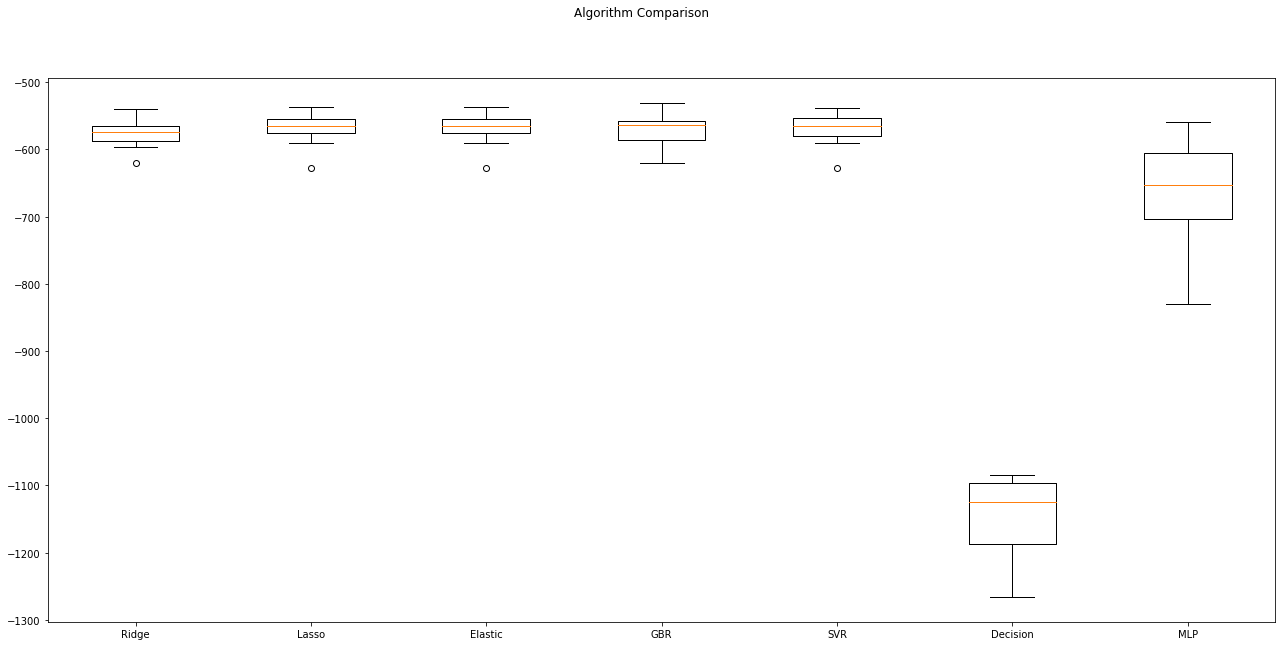

In [654]:
# Compare Algorithms
fig = plt.figure(figsize=(22,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hyperparameter Tuning

MAE: -23.859

Best params:
 {'alpha': 0.03}


,index,0,error
0,58.711055,100.0,-41.288945
1,54.492689,100.0,-45.507311
2,60.327426,100.0,-39.672574
3,54.411897,100.0,-45.588103
4,60.201055,100.0,-39.798945
...,...,...,...
1128,61.196882,8.0,53.196882
1129,58.898742,8.0,50.898742
1130,59.037710,7.0,52.037710
1131,59.668492,5.0,54.668492


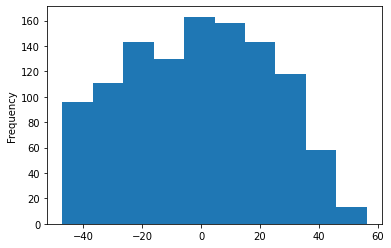

In [656]:
# Linear is our best model
scoring = 'neg_mean_absolute_error'
model = Lasso()
scoring = 'neg_root_mean_squared_error'
parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
lasso_grid = GridSearchCV(estimator=model,
			param_grid=parameters,scoring = scoring)
lasso_grid.fit(X_train, Y_train)
print('MAE: %.3f' % lasso_grid.best_score_)
print('\nBest params:\n', lasso_grid.best_params_)
lasso_predictions = lasso_grid.predict(X_validation)
predictions_list = []
validation_list = []
for i,g in zip(lasso_predictions,Y_validation):
	predictions_list.append(i)
	validation_list.append(g)

output_dict = dict(zip(predictions_list,validation_list))

output_frame = pd.DataFrame.from_dict(output_dict,orient='index').sort_values(by=0,ascending = False).reset_index()

output_frame['error'] = output_frame['index'] - output_frame[0]
#erros look normal
output_frame['error'].plot(kind = 'hist')
# Y_Pred = pd.DataFrame(lasso_predictions)
# Y_Actuals = pd.DataFrame(Y_validation)
# dataframe = pd.concat([Y_Pred,Y_Actuals], axis =1)

# dataframe.to_csv('~/Desktop/Grailed_Scraper/0202_data_grailed_results.csv')


In [ ]:
parameters = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
scoring = 'neg_mean_absolute_error'
model = MLPRegressor()
grid = GridSearchCV(estimator=model,
			param_grid=parameters,scoring = scoring)
grid.fit(X_train, Y_train)
print('MAE: %.3f' % grid.best_score_)
print('\nBest params:\n', grid.best_params_)
predictions = grid.predict(X_validation)



# RMSE Plot

###Error Distribution